# Regression and Interpolation
In this exercise, we are going to use Python's built-in functions for regression and interpolation. The goal is to determine whether regression or interpolation is the better choice for a given set of data. We are going to revisit two sets of data that you previously used.<br><br>
Upload the $current.txt$ data to the Python workspace. Remember that this data has a header, so you need to skip the first row. Its delimiter is also a comma. Assign the time column to the variable $tc$ and the current column to the variable $ic$. Plot this data using black circles as markers. Add figure titles and axes labels.

Text(0, 0.5, 'Current (A)')

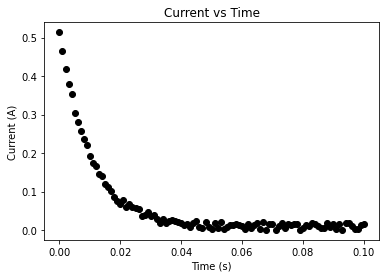

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.interpolate import CubicSpline

A1 = np.loadtxt('current.txt', delimiter = ',',skiprows=1)
tc = A1[:,0]
ic = A1[:,1]
plt.plot(tc,ic,'ko')
plt.title("Current vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")

Upload the $normal.txt$ data to the Python workspace. Assign the time column from 1.5 seconds to 5.0 seconds to the variable $tn$ and the corresponding current column to the variable $fn$. This time range corresponds to $i=15$ to $i=50$. Plot this data using black circles and solid lines as markers. Add figure titles and axes labels.

Text(0, 0.5, 'Normal Force (N)')

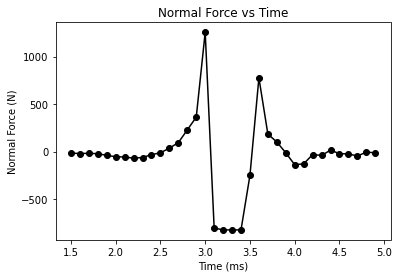

In [2]:
A2 = np.loadtxt('normal.txt')
tn = A2[15:50,0]
fn = A2[15:50,1]
plt.plot(tn,fn,'ko-')
plt.title("Normal Force vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Normal Force (N)")

### TASK 1. Perform Regression on Data Sets
For both data sets, perform polynomial regression. To do this, use the $polyfit()$ function. The first two arguments are the x- and y-data set. The third argument is the order of the polynomial. Thus, if we're talking about linear regression, then the third argument should be 1. For now, we let the order be equal to 1. Assign the order to the variable $m$ in the field below.

In [3]:
m = 1

The output of the $polyfit()$ function will be the coefficients of the polynomial equation, the first being the slope of the best fit line, while the second is the y-intercept. The polynomial function is given by<br><br>
$yfit = B(0)t^m + B(1)t^{m-1} + B(2)t^{m-2} + ... + B(m)$
<br><br>where $yfit$ is the fitting function and $B(i)$ are the coefficients of $yfit$ generated from the $polyfit()$ function. Note that the coefficients $B(i)$ have been rewritten  so that it begins with the lowest index number of zero for Python (compare with MATLAB file).<br><br>Use the $polyfit()$ function to determine the coefficients of the $current$ and $normal$ data. Assign the output to the variables $Bc$ and $Bn$, respectively. Remember to use the variable $m$ as the third argument. 

In [4]:
# We are now going to record the process time for the 
# regression algorithm. This command begins the time recording.
t = time.time()     # DO NOT CHANGE THIS LINE.'

# Write your code below this line.
Bc = np.polyfit(tc,ic,m)
Bn = np.polyfit(tn,fn,m)
# DO NOT WRITE ANY CODE BELOW THIS LINE.

# This command marks the time after these process steps above.
elapsed = time.time() - t      # DO NOT CHANGE THIS LINE AND THE NEXT LINE.
print('The elapsed time is' + str(elapsed) + ' seconds.')  

The elapsed time is0.008847236633300781 seconds.


Using the x-data set for current, $tc$, generate a new set of current values from the coefficients obtained from the $polyfit()$. Assign these new data set to the variable $Ic$.

In [5]:
sumc = np.zeros(len(tc))
for i in range(m+1):
    sumc += Bc[i]*tc**(m-i)
Ic = sumc

Plot the best fit line, $(tc,Ic)$ and compare it in the same plot with the original current data, $(tc,ic)$. Use the same black circles for the current data and a red line, with a linewidth of 3 units, for the best fit line.

Text(0, 0.5, 'Current (A)')

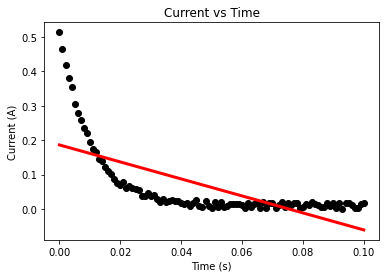

In [6]:
plt.plot(tc,ic,'ko')
plt.plot(tc,Ic,'r',linewidth=3)
plt.title("Current vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")

Using the x-data set for current, $tn$, generate a new set of current values from the coefficients obtained from the $polyfit()$. Assign these new data set to the variable $Fn$.

In [7]:
sumn = np.zeros(len(tn))
for i in range(m+1):
    sumn += Bn[i]*tn**(m-i)
Fn = sumn

Plot the best fit line, $(tn,Fn)$ and compare it in the same plot with the original current data, $(tc,fn)$. Use the same black circles and solid lines for the current data and a red line, with a linewidth of 3 units, for the best fit line.

Text(0, 0.5, 'Normal Force (N)')

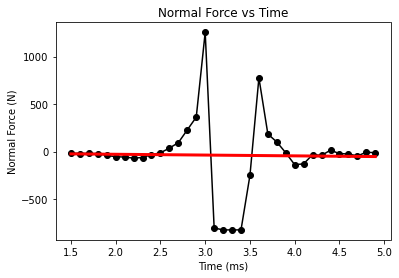

In [8]:
plt.plot(tn,fn,'ko-')
plt.plot(tn,Fn,'r',linewidth=3)
plt.title("Normal Force vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Normal Force (N)")

The equation for the error is shown in one of the video lectures and is given by<br><br>
$err = \sqrt{\frac{\displaystyle\sum_{i=1}^n (y_i-y_{int})^2}{n-(m+1)}}$
<br><br>where $n$ is the number of data points and $m$ is the highest power or degree of the polynomial fitting function, $yfit$.
<br><br>Solve for the error corresponding to each fit. Use the $sum()$ function to make it easier for you to sum matrix elements. Assign the variables $ec$ and $en$ to the errors from the $current$ data set and the $normal$ data set, respectively.

In [9]:
ec = np.sqrt(sum((Ic-ic)**2)/(len(ic)-(m+1)))
print(ec)
en = np.sqrt(sum((Fn-fn)**2)/(len(fn)-(m+1)))
print(en)

0.0770906459282248
396.03789387603103


Change the order of the polynomial, $m$, to the next higher order and observe whether either or both of the graphs become closer to their best fit line and if their errors decrease. Write down the error values in the field below.<br><br>
Note: When you change the order, this means that you have more coefficients and each coefficient must be multiplied to a certain power of the x-data set. This means you have to change the numerical expression for $Ic$ and $Fn$. To do this efficiently, use a $for$ loop.

In [10]:
#  n  #   current     #    normal     #        elapsed time
#  1  #
#  2  #
#  4  #
# Which of the two data sets is suitable for a regression type of fitting? Justify your answer.

### TASK 2. Perform Interpolation on Data Sets


Using the same data sets, we are now going to perform spline interpolation and determine which type of data is more suitable to this kind of fitting.<br><br>
First, we need to define a new set of data points with respect to the x-axis variable that have more data points in between. For example, let $q$ be the variable that defines how many data points you want to insert between existing data points of the time variables $tc$ and $tn$. In the field below, type $q$ and equate that to, let's say for now, 5.

In [12]:
q = 5

This means that I am adding 5 data points between any two existing data points in $tc$ or $tn$. For example, $tc$ currently has

In [13]:
print(len(tc))    # Run this cell to see the output

101


data points. If we add $q$ data points between any two data points, that means the total number of data points will then be

In [14]:
print( len(tc)  + (len(tc)-1)*q )       # Run this cell to see output

601


From this point, the instructions will be commented in the same cell as all commands in order to measure the elapsed processing time to solve for the interpolation points. For the $CubicSpline()$ function that you are going to use in the next cell, use this reference: https://pythonnumericalmethods.berkeley.edu/notebooks/chapter17.03-Cubic-Spline-Interpolation.html.<br><br>
The first two arguments in the function are the x- and y-data sets. Use bc_type = 'natural' for the third argument. Save the output of $CubicSpline()$ function to the variable $f$.

In [15]:
# Let's now make a new variable, tcq, with this number of data points.
t = time.time()      # DO NOT CHANGE THIS LINE

#Write your code below this line. Follow the instructions carefully.

# Let's now make a new variable, $tcq$, with the same number of data points as in 
# the previous statement. Use the $linspace()$ command from the numpy module to 
# generate new x-data points with q = 5 data points between the existing ones in $tc$,
# and assign these new x-data points to the variable $tcq$. You may also need the 
# $min()$ and $max()$ commands from the numpy module. The variable $tcq$ is now 
# called the query points corresponding to the $current$ data.
tcq = np.linspace(np.min(tc),np.max(tc), len(tc) + (len(tc)-1)*q)

# Do the same and generate and assign the query points for the $normal$ data 
# to the variable $tnq$.
tnq = np.linspace(np.min(tn),np.max(tn), len(tn) + (len(tn)-1)*q)

# Using the $CubicSpline()$ function to generate the new values for the $current$ data 
# and assign them to the variable, #Icspline.
f = CubicSpline(tc,ic, bc_type = 'natural')
Icspline = f(tcq)

# Using the $CubicSpline()$ function to generate the new values for the $normal$ data 
# and assign them to the variable, #Fnspline.
f = CubicSpline(tn,fn, bc_type = 'natural')
Fnspline = f(tnq)

# DO NOT WRITE ANY CODE BELOW THIS LINE. 
elapsed = time.time() - t         # DO NOT CHANGE THIS LINE AND THE NEXT LINE.
print('The elapsed time is' + str(elapsed) + ' seconds.')  

The elapsed time is0.00368499755859375 seconds.


From this point, we revert back to Markdown instructions.<br><br>
Plot the best fit line, $(tcq,Icspline)$ and compare it in the same plot with the original current data, $(tc,ic)$. Use the same black circles for the $current$ data and a red line, with a LineWidth of 3 units, for the best fit line. If necessary use the command $xlim()$ and $ylim()$ to limit the range of the graphs to within the limits of integration.

Text(0, 0.5, 'Current (A)')

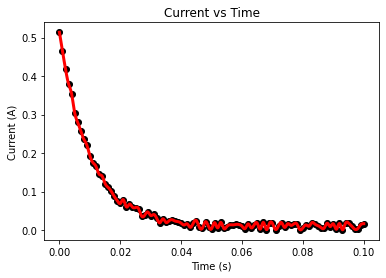

In [16]:
plt.plot(tc,ic,'ko')
plt.plot(tcq,Icspline,'r',linewidth=3)
plt.title("Current vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")

Plot the best fit line, $(tnq,Fnspline)$ and compare it in the same plot with the original current data, $(tn,fn)$. Use the same black circles and solid lines for the $current$ data and a red line, with a LineWidth of 3 units, for the best fit line. If necessary use the command $xlim()$ and $ylim()$ to limit the range of the graphs to within the limits of integration.

Text(0, 0.5, 'Normal Force (N)')

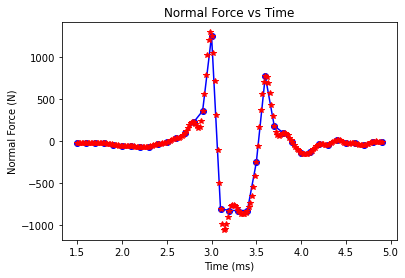

In [18]:
plt.plot(tn,fn,'bo-')
plt.plot(tnq,Fnspline,'r*',linewidth=3)
plt.title("Normal Force vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Normal Force (N)")

Change the number of data points, $q$, according to the table below and observe whether either or both of the graphs become reasonably and realistically close.

In [17]:
#  q   #    observations: describe the fitting using interpolation
#  5   #
#  10  #
#  50  #
# Which of the two data sets is suitable for a interpolation type of fitting 
# based on these results?
# Justify your answer.